In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')

In [3]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_df.shape

(60000, 785)

In [5]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [7]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,142,155,102,67,125,95,75,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,39,31,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
LOOKUP = {0: 'T-shirt', 
          1: 'Trouser', 
          2: 'Pullover', 
          3: 'Dress', 
          4: 'Coat',
          5: 'Sandal', 
          6: 'Shirt', 
          7: 'Sneaker', 
          8: 'Bag', 
          9: 'Ankle boot'}

In [10]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [11]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]

Y = fashion_mnist_df['label']

In [13]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,142,155,102,67,125,95,75,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,39,31,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y.head()

0    2
1    7
2    8
3    3
4    9
Name: label, dtype: int64

In [15]:
X.loc[5].values[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
Y.loc[5]

9

Actual label:  Ankle boot


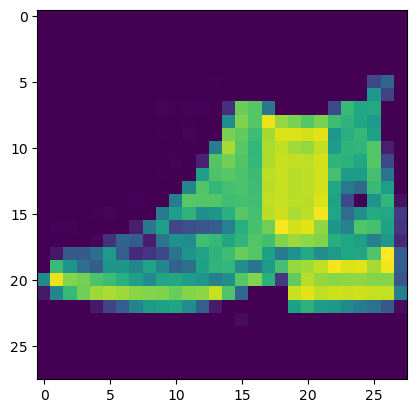

In [17]:
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Trouser


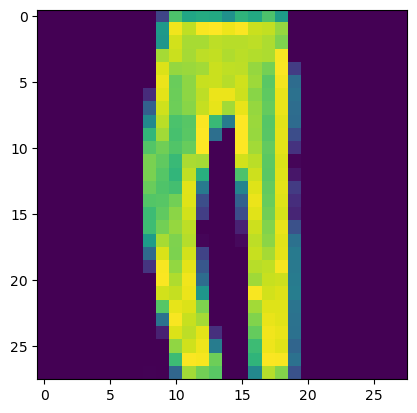

In [37]:
display_image(X.loc[568].values, Y.loc[568])

Actual label:  Trouser


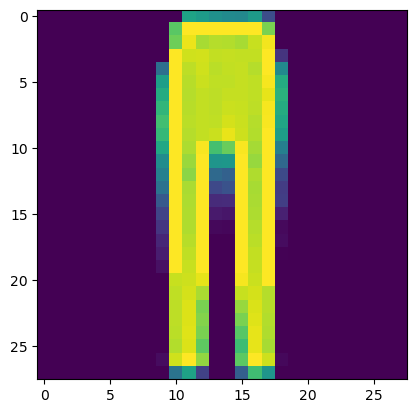

In [24]:
display_image(X.loc[15088].values, Y.loc[15088])

In [25]:
X = X/255.

X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.556863,0.607843,0.4,0.262745,0.490196,0.372549,0.294118,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.152941,0.121569,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [28]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [29]:
def summarize_classification(y_test, 
                             y_pred, 
                             avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

#### Algorithm to use in the optimization problem.

* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

In [31]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [32]:
y_pred = logistic_model.predict(x_test)

y_pred

array([0, 1, 6, ..., 5, 1, 3])

In [33]:
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count :  2992
accuracy_score :  0.8311111111111111
precision_score :  0.8309889891668787
recall_score :  0.8311111111111111


In [34]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(20)

,y_test,y_pred
597,3,3
8817,9,9
2720,6,6
12572,7,7
5497,1,1
17001,0,0
121,8,6
867,7,7
14724,0,0
1031,1,1


Actual label:  Dress


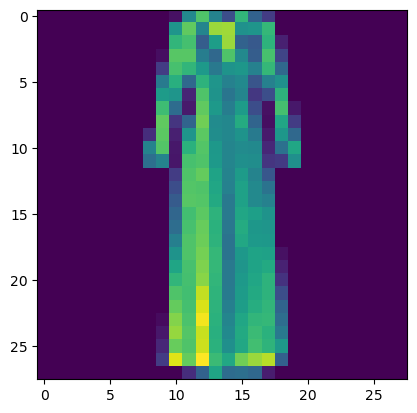

In [38]:
display_image(X.loc[597].values, Y.loc[597])